In [1]:
import pandas as pd
import numpy as np
from math import log2
from sklearn.metrics import accuracy_score
import networkx as nx
from treelib import Tree

In [2]:
df = pd.read_csv("PlayTennis.csv")
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
class node:
    def __init__(self, data=None,value=None, base=None, b_value=None):
        self.data = data
        self.child = []
        self.value = value
        self.b_value = b_value
        self.base = base
        self.leaf = False
    def is_leaf():
        return leaf

In [4]:
def best_split(DATA):
    S = 0
    s_v = []
    s_v.append(len(DATA[DATA["Play Tennis" ] == "Yes"])/len(DATA))
    s_v.append(len(DATA[DATA["Play Tennis" ] == "No"])/len(DATA))
    for v in s_v:
        S -= v * log2(v)
    E_C = {}
    for c in DATA.drop("Play Tennis", axis=1, inplace=False).columns:
        E_C[c] = S
        for j in DATA[c].unique():
            s_v = []
            x = DATA[DATA[c] == j].drop(c, axis=1)
            s_v.append(len(x[x["Play Tennis" ] == "Yes"])/len(x))
            s_v.append(len(x[x["Play Tennis" ] == "No"])/len(x))
            temp = 0
            for v in s_v:
                if v != 0:
                    temp -= v * log2(v)
            E_C[c] -= (len(x)/len(DATA)  * temp)
    return max(E_C, key=E_C.get)

In [5]:
def split(DATA, c):
    result = {}
    for j in DATA[c].unique():
        result[j] = DATA[DATA[c] == j].drop(c, axis=1)
    return result

In [6]:
def fit(c_node = node(), step = 0):
    if c_node.data["Play Tennis"].nunique() == 1:
        c_node.leaf = True
        c_node.value = c_node.data["Play Tennis"].unique()[0]
        return;
    if c_node.data.shape[1] <= 2:
        c_node.leaf = True
        p = len(c_node.data[c_node.data["Play Tennis"] == "Yes"])/len(c_node.data)
        if p >= 0.5:
            c_node.value = "Yes"
        else:
            c_node.value = "No"
        return
    c = best_split(c_node.data)
    x = split(c_node.data, c)
    c_node.base = c
    for i, d in x.items():
        c_node.child.append(node(data=d, b_value=i))
    for i in c_node.child:
        #print(f"Height {step+1} data of child based on {i.b_value}:\n", i.data, "\n\n")
        fit(i, step+1)

In [7]:
def match(Row):
    c_node = root
    while(c_node.leaf == False):
        for i in c_node.child:
            if i.b_value == Row[c_node.base]:
                c_node = i
                break
    return str(c_node.value)

In [8]:
def predict(Data):
    Y = Data["Play Tennis"]
    ŷ = [match(row) for _, row in Data.iterrows()]
    return ŷ,list(Y)

In [9]:
root = node(data=df)
fit(root)

In [10]:
ŷ, Y = predict(df.iloc[: , :])
accuracy_score(ŷ, Y)

1.0

In [11]:
def Draw(G, c_node, p_node = None):
    if c_node.leaf == True:
        v = c_node.b_value
        G.add_node(v)
        G.add_edge(v, p_node.base)
        return
    G.add_node(c_node.base)
    if(p_node != None):
        G.add_edge(c_node.base, p_node.base)
    for i in c_node.child:
        Draw(G, i, c_node)

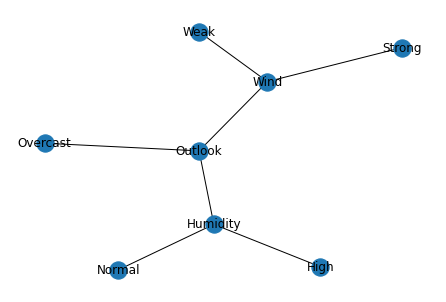

In [12]:
G = nx.Graph()
c_node = root
Draw(G, c_node)
nx.draw(G, with_labels = 1)

In [13]:
def draw(c_node, p_node = None):
    if c_node.leaf == True:
        tree.create_node(c_node.b_value, c_node.b_value, parent=p_node.base)
        return
    if(p_node != None):
        tree.create_node(c_node.base, c_node.base, parent=p_node.base)
    else:
        tree.create_node(c_node.base, c_node.base)
    for i in c_node.child:
        draw(i, c_node)

In [14]:
tree = Tree()
c_node = root
draw(c_node)
tree.show()

Outlook
├── Humidity
│   ├── High
│   └── Normal
├── Overcast
└── Wind
    ├── Strong
    └── Weak



In [15]:
for i in range(len(df)):
    item = np.split(df, len(df))
    pre = item[i]
    item.pop(i)
    rt = node(data=pd.concat(item))
    fit(rt)
    ŷ, Y = predict(pre)
    print(f"for {i+1}th fold acc is : ", accuracy_score(ŷ, Y))

for 1th fold acc is :  1.0
for 2th fold acc is :  1.0
for 3th fold acc is :  1.0
for 4th fold acc is :  1.0
for 5th fold acc is :  1.0
for 6th fold acc is :  1.0
for 7th fold acc is :  1.0
for 8th fold acc is :  1.0
for 9th fold acc is :  1.0
for 10th fold acc is :  1.0
for 11th fold acc is :  1.0
for 12th fold acc is :  1.0
for 13th fold acc is :  1.0
for 14th fold acc is :  1.0
